In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

Data source: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/cardio_data_processed.csv', sep=",")

In [13]:
df.head()
# Some data needs to be normalized and converted

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [14]:
df.info()
# No missing data observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [15]:
cardio_cnt = df.groupby("cardio")["id"].count()/len(df)
cardio_cnt
# The target data is approximately evenly distributed.

cardio
0    0.506312
1    0.493688
Name: id, dtype: float64

In [5]:
# Drop colums that are less meaningful or duplicate
df = df.drop(['id', 'age' ,'bp_category'], axis=1)

In [6]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


## Visualize Data

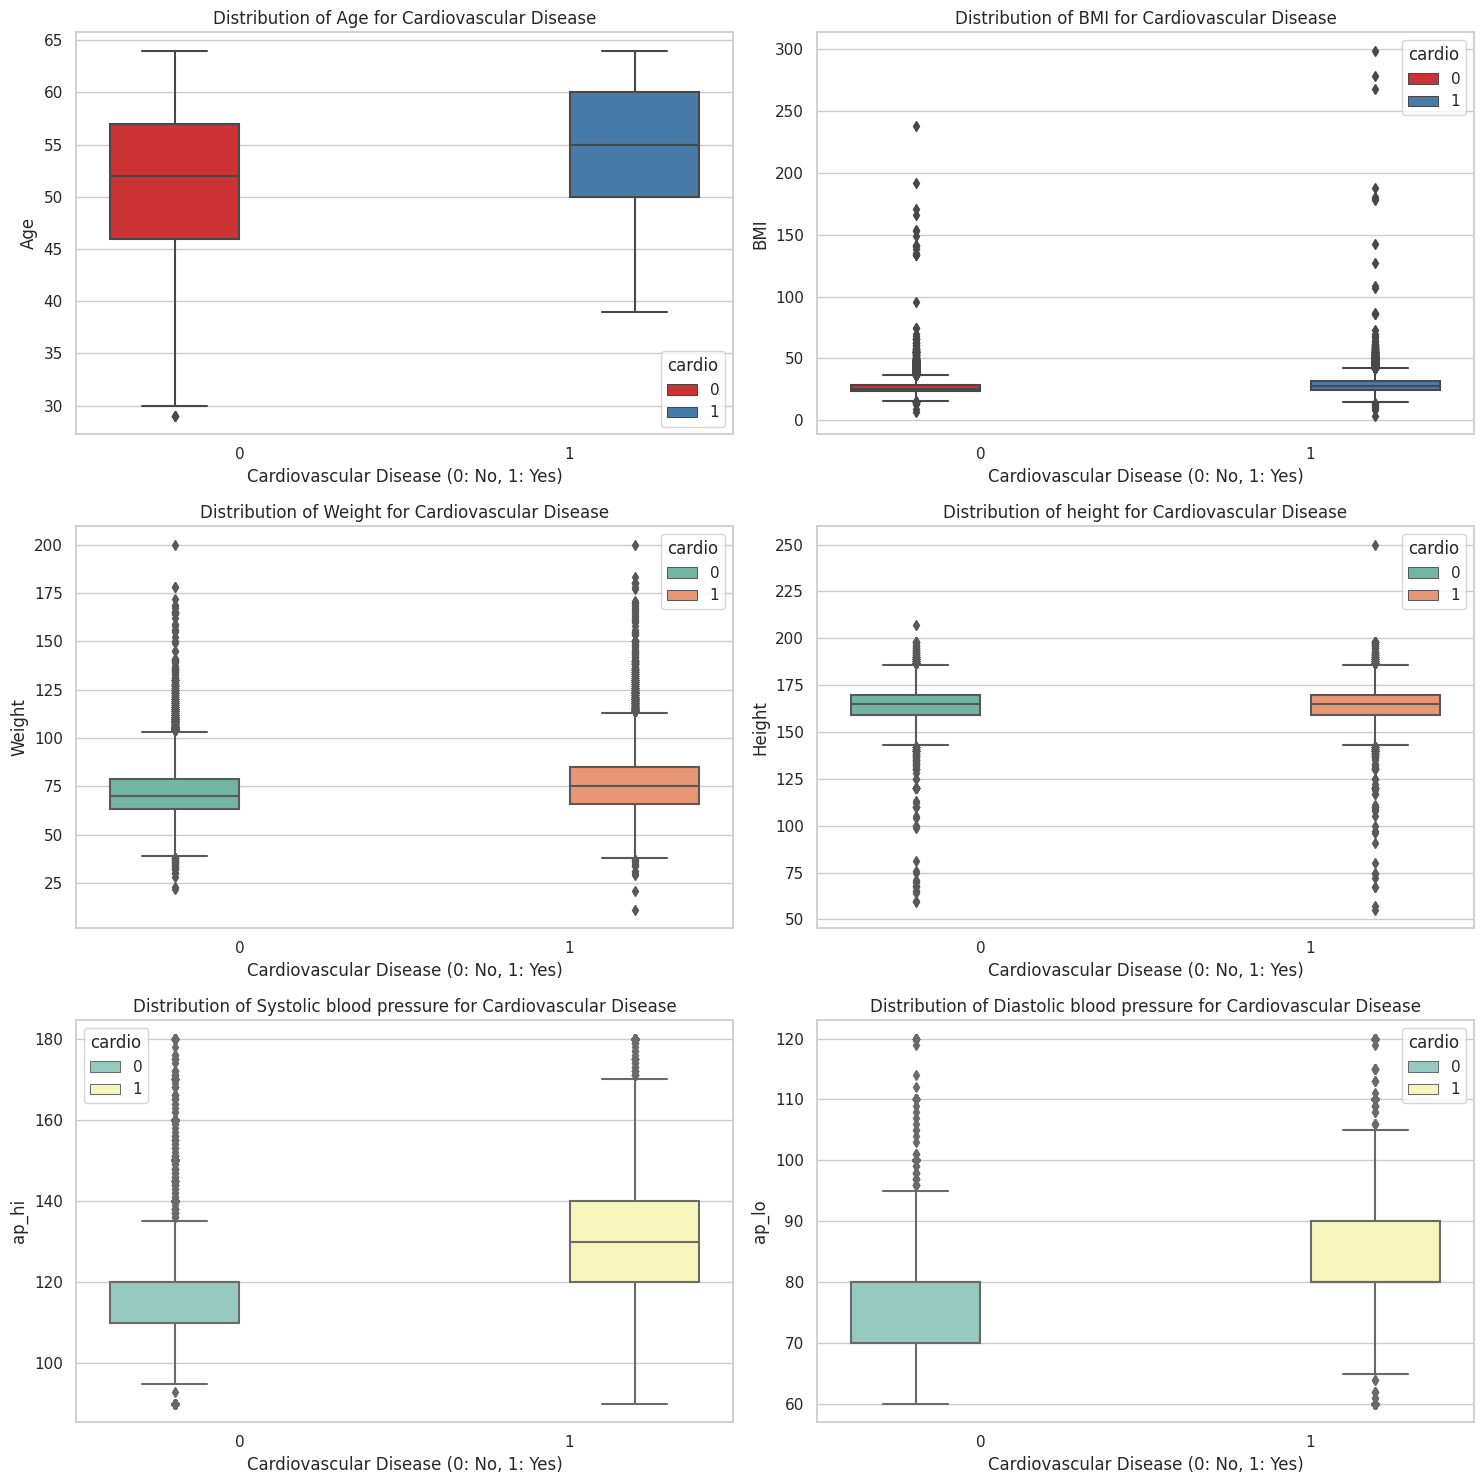

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Depict all numeric variables
# Set the style of seaborn as white grid
sns.set(style="whitegrid")

# Create a boxplot for each feature
plt.figure(figsize=(15, 15))

# Boxplot for Age
plt.subplot(3, 2, 1)
sns.boxplot(x='cardio', y='age_years', data=df, hue='cardio', palette='Set1')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Distribution of Age for Cardiovascular Disease')

# Boxplot for BMI
plt.subplot(3, 2, 2)
sns.boxplot(x='cardio', y='bmi', data=df, hue='cardio', palette='Set1')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('Distribution of BMI for Cardiovascular Disease')

# Boxplot for Weight
plt.subplot(3, 2, 3)
sns.boxplot(x='cardio', y='weight', data=df, hue='cardio', palette='Set2')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Weight')
plt.title('Distribution of Weight for Cardiovascular Disease')

# Boxplot for Height
plt.subplot(3, 2, 4)
sns.boxplot(x='cardio', y='height', data=df, hue='cardio', palette='Set2')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Height')
plt.title('Distribution of height for Cardiovascular Disease')

# Boxplot for ap_hi (Systolic blood pressure)
plt.subplot(3, 2, 5)
sns.boxplot(x='cardio', y='ap_hi', data=df, hue='cardio', palette='Set3')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('ap_hi')
plt.title('Distribution of Systolic blood pressure for Cardiovascular Disease')

# Boxplot for ap_lo (Diastolic blood pressure)
plt.subplot(3, 2, 6)
sns.boxplot(x='cardio', y='ap_lo', data=df, hue='cardio', palette='Set3')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('ap_lo')
plt.title('Distribution of Diastolic blood pressure for Cardiovascular Disease')

# Adjust layout
plt.tight_layout()
plt.show()


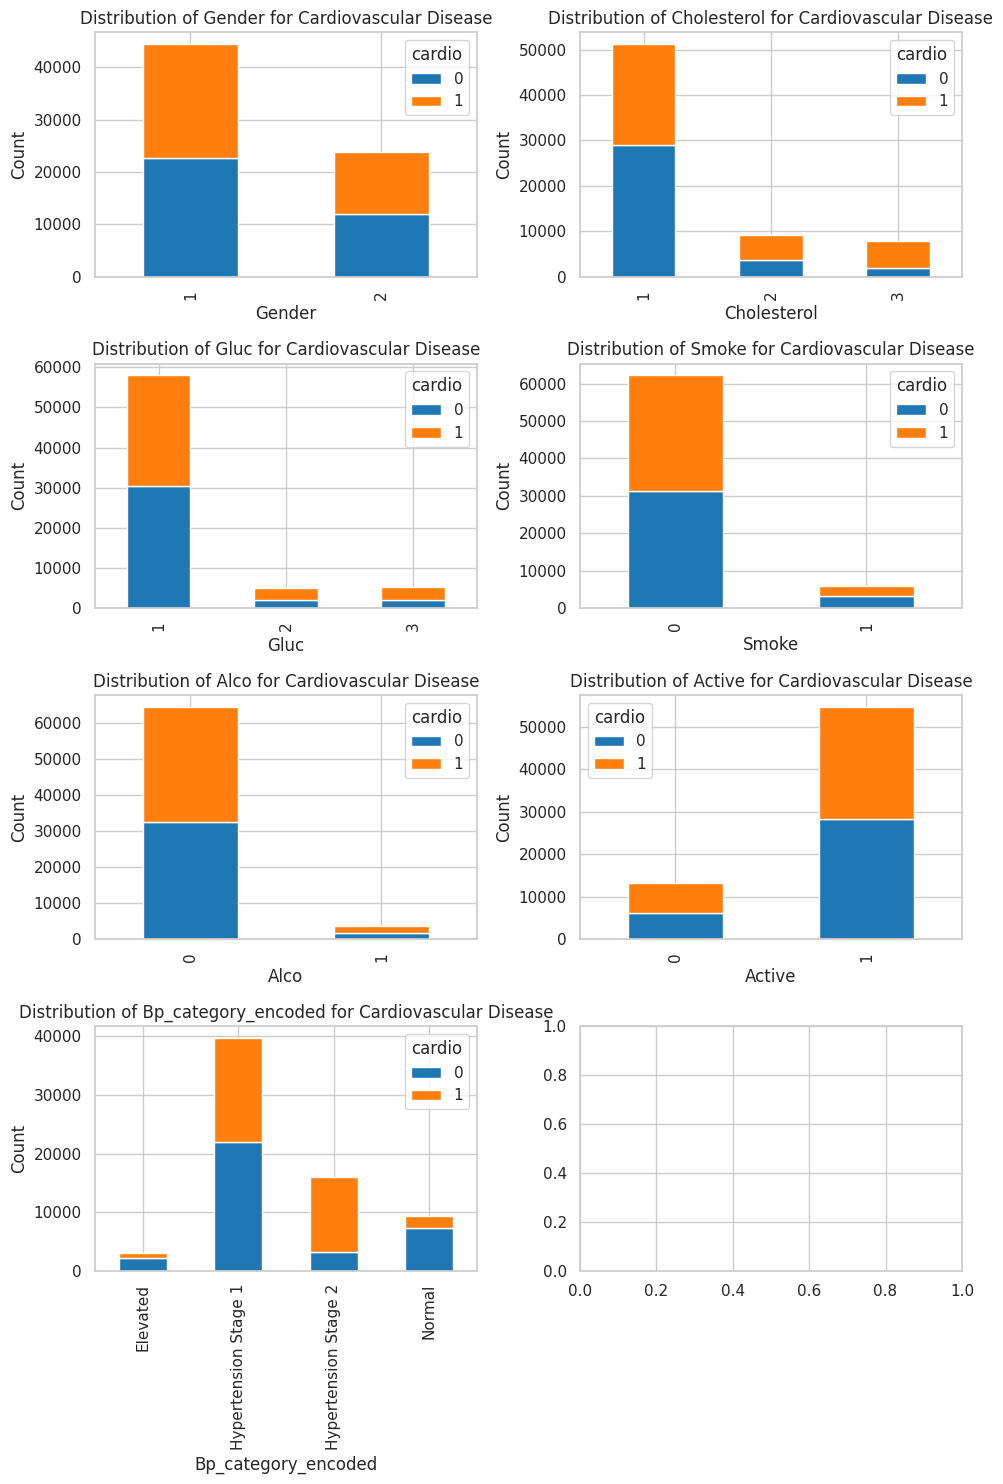

In [15]:
# Depict all categorical variables
# Create a shared ax for all subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

# Flatten the 2D array of axes
axes = axes.flatten()

# Loop through each categorical variable
for i, categorical_var in enumerate(['gender', 'cholesterol',	'gluc', 'smoke', 'alco', 'active', 'bp_category_encoded']):
    # Count the occurrences of each combination of the categorical variable and 'cardio'
    cate_cardio_counts = df.groupby([categorical_var, 'cardio']).size().unstack()

    # Plot a stacked bar chart
    cate_cardio_counts.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e'])

    axes[i].set_xlabel(f'{categorical_var.capitalize()}')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {categorical_var.capitalize()} for Cardiovascular Disease')


plt.tight_layout()
plt.show()


## Convert data

In [16]:
# Check the distinct value of the column
unique_values = df['bp_category_encoded'].unique()
print(unique_values)

['Hypertension Stage 1' 'Hypertension Stage 2' 'Normal' 'Elevated']


In [17]:
# Convert categorical values to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['bp_category_encoded'] = label_encoder.fit_transform(df['bp_category_encoded'])

## Model data

In [18]:
import time

# Start the timer
start_time = time.time()

In [19]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define X and y
y = df.cardio
X = df.drop('cardio', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=456)

In [20]:
from sklearn.preprocessing import StandardScaler
# List of numeric columns
numeric_columns = ['age_years', 'weight', 'height', 'bmi', 'ap_hi', 'ap_lo']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [21]:
# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7271527709901281
[[0.4050435  0.10126087]
 [0.17158636 0.32210928]]


In [22]:
# Train a new logistic regression
log_reg = LogisticRegression(penalty='l2', C=7).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7271038999120321
[[0.40499462 0.10130974]
 [0.17158636 0.32210928]]


In [23]:
# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Elapsed time: 119.60 seconds
